# Exploratory Data Analysis of a Real World Dataset

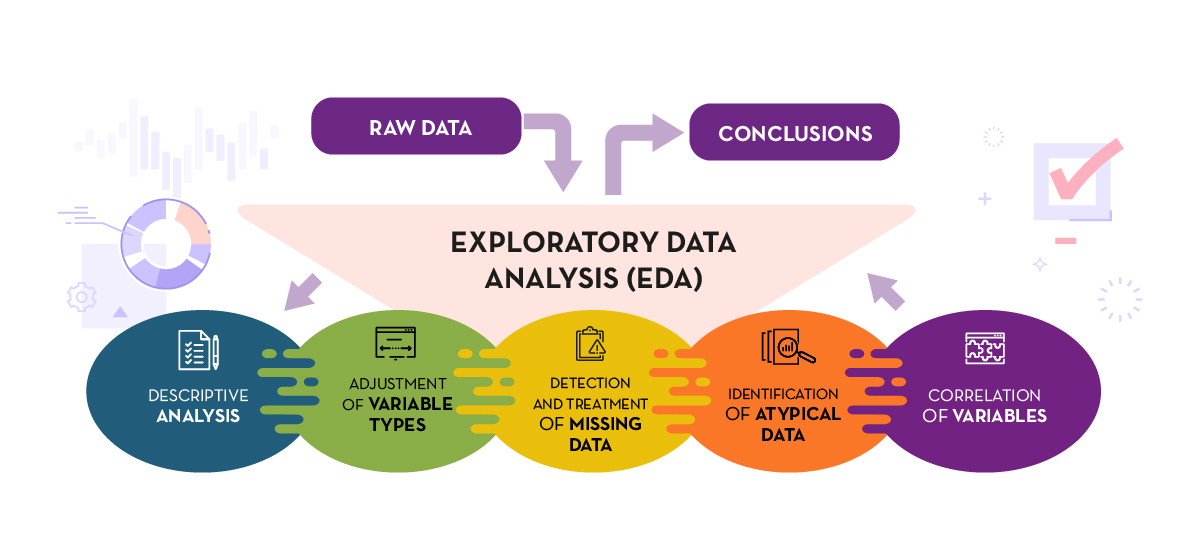


## Background Information on the Data

The intended target for prediction is `ct090`, `case_id` is the unique identifier, `keydate` is the point in time when some event has happened in the lifecycle of a case, and also a date relative to which all of the backward looking variables and forward looking targets are calculated. 

In this case, it's a general purpose propensity to pay model, which means that it is a freshly registered case, where all the relevant data has been gathered and verified. In other words, `keydate` is set a few days after registration, and target `ct090` is checking for outcome in 90 days (`ap090` is a similar regression target), while all the rest of the data is only looking backwards!

Metadata gives some basic description of variables. The general naming convention is based on prefixes that define aggregation levels 

- `cXXXX` looking at the data of this case only, 

- `dXXXX` looking at other cases of same debtor, 

- `bXXXX` looking at all cases of the debtor, 

- `aXXXX` looking at all the cases on the same address.

This is not very relevant for this particular task, but gives some idea of our data setup here in Intrum! Note that this data selection has quite a few variables with the `dXXXX` prefix, which means that this selection is specifically looking at debtors that we already had worked with before, therefore, variable selection is much broader and models are generally better. 

One more tip on interpretation of missing values: if variable is bound by time window, e.g. `d2112 NumberOfCustomerPaymentsInLast12Months`, the `NA` value implies that there never have been any values, while `0` would mean that have been no values within bounding period (in this case 12 months). In other words, `0` and `NA` have different interpretation. It may or may not be relevant, depending on the choice of the modelling approach. 


## Data Cleaning

Data Cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct.

### Importing our Dataset
First of all, we are going to do some **data preprocessing** with Pandas.

In [1]:
import pandas as pd

df = pd.read_csv(
    "datos.csv",
    usecols = lambda x: 'Unnamed' not in x, # To avoid retrieving the unlabeled column 
    parse_dates = ['keydate'], # The keydate is now with date format
    index_col = ['case_id'] # The index are now the IDs
)

df.rename(columns = {'ct090':'Target90Days', 
                     'ap090':'TargetAmount90Days',
                     'c0001':'OriginalCapitalOfCaseInvoices',
                     'c0039':'IndustryCode',
                     'c0044':'ClientName',
                     'd0031':'NumberOfUnsuccessfullyClosedCustomerCasesLast36Months',
                     'b0007':'AmountOfCustomerPaymentsOnAllCasesBlevel',
                     'd0009':'AmountOfCustomerOpenCases',
                     'c0031':'NumberOfTelephonesCI',
                     'a8404':'RatioOfCustomersAtAddressWithSuccessfullyClosedCasesLast36Months',
                     'c0019':'AgeOfDebt',
                     'd0027':'NumberOfCustomerIncomingCallDatesTee',
                     'c9008':'CustomerAge',
                     'd2112':'NumberOfCustomerPaymentsInLast12Months',
                     'd0012':'LastOriginalClosingCodeOfCustomer',
                     'd1205':'NumberOfSuccessfullyClosedCasesInLast24Months',
                     'c0015':'AmountOfCase'}, inplace = True)

df.head()

,keydate,Target90Days,TargetAmount90Days,OriginalCapitalOfCaseInvoices,IndustryCode,ClientName,NumberOfUnsuccessfullyClosedCustomerCasesLast36Months,AmountOfCustomerPaymentsOnAllCasesBlevel,AmountOfCustomerOpenCases,NumberOfTelephonesCI,RatioOfCustomersAtAddressWithSuccessfullyClosedCasesLast36Months,AgeOfDebt,NumberOfCustomerIncomingCallDatesTee,CustomerAge,NumberOfCustomerPaymentsInLast12Months,LastOriginalClosingCodeOfCustomer,NumberOfSuccessfullyClosedCasesInLast24Months,AmountOfCase
case_id,,,,,,,,,,,,,,,,,,
1,2017-08-12,0.0,0.0,221.68,K6622,1,2.0,0.00,238.38,2.0,NaN,98.0,0.0,49.0,0.0,1,NaN,222.69
2,2017-02-03,0.0,0.0,151.36,K6512,2,NaN,210.53,0.00,5.0,NaN,109.0,2.0,51.0,0.0,2,1.0,212.72
3,2017-02-17,0.0,0.0,48.84,K6512,3,1.0,NaN,0.00,2.0,0.0,748.0,0.0,48.0,NaN,3,NaN,56.84
4,2017-09-18,0.0,0.0,413.15,K6622,4,NaN,NaN,54.14,3.0,1.0,8.0,0.0,27.0,NaN,4,NaN,463.15
5,2017-07-22,0.0,0.0,125.83,K6512,5,2.0,20.00,83.00,6.0,NaN,324.0,0.0,40.0,0.0,1,NaN,146.09


### Finding any Missing Values

Now, we are going to **analyze the NaNs**. We can’t ignore missing data because many algorithms will not accept missing values.

In [2]:
df.isna().sum()/len(df)*100 # This will show the percentage of NaNs in each column

keydate                                                              0.000000
Target90Days                                                         0.000000
TargetAmount90Days                                                   0.000000
OriginalCapitalOfCaseInvoices                                        0.083333
IndustryCode                                                         0.000000
ClientName                                                           0.000000
NumberOfUnsuccessfullyClosedCustomerCasesLast36Months               42.096667
AmountOfCustomerPaymentsOnAllCasesBlevel                            56.420000
AmountOfCustomerOpenCases                                            0.000000
NumberOfTelephonesCI                                                 0.000000
RatioOfCustomersAtAddressWithSuccessfullyClosedCasesLast36Months    34.670000
AgeOfDebt                                                            0.000000
NumberOfCustomerIncomingCallDatesTee                            

When dealing with missing values, **different alternatives** can be applied:

- check the source, for example by contacting the data source to correct the missing values,
- drop missing values,
- replace the missing value with a value or
- leave the missing value as it is.

As previously noted, `0` and `NA` have different interpretation. The `NA` value implies that there never have been any values, while `0` would mean that have been no values within bounding period (e.g., 12 months). In consequence, we are going to **replace the missing values with -1**.

In [3]:
df= df.fillna(-1)
df.isna().sum()/len(df)*100 

keydate                                                             0.0
Target90Days                                                        0.0
TargetAmount90Days                                                  0.0
OriginalCapitalOfCaseInvoices                                       0.0
IndustryCode                                                        0.0
ClientName                                                          0.0
NumberOfUnsuccessfullyClosedCustomerCasesLast36Months               0.0
AmountOfCustomerPaymentsOnAllCasesBlevel                            0.0
AmountOfCustomerOpenCases                                           0.0
NumberOfTelephonesCI                                                0.0
RatioOfCustomersAtAddressWithSuccessfullyClosedCasesLast36Months    0.0
AgeOfDebt                                                           0.0
NumberOfCustomerIncomingCallDatesTee                                0.0
CustomerAge                                                     

### Finding Duplicated Values

Now, we are going to **analyze duplicated values**, since this is a very common phenomenon in data collection.

In [4]:
df.duplicated().value_counts()

False    30000
dtype: int64

As can be seen, there are **no duplicate rows**.

## Exploratory Data Analysis

Exploratory Data Analysis (from now on, EDA) refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### Observing our Dataset & Categorizing its Values

One of the most important steps of EDA is observing the shape of the dataset and understanding what the data is telling us, this is, understanding what each column means. Also, we will be noting the datatypes for each variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   keydate                                                           30000 non-null  datetime64[ns]
 1   Target90Days                                                      30000 non-null  float64       
 2   TargetAmount90Days                                                30000 non-null  float64       
 3   OriginalCapitalOfCaseInvoices                                     30000 non-null  float64       
 4   IndustryCode                                                      30000 non-null  object        
 5   ClientName                                                        30000 non-null  int64         
 6   NumberOfUnsuccessfullyClosedCustomerCasesLast36Months             3000

As it can be seen, the dataset consists of 30.000 rows and 18 columns. Regarding the variables:

- **`Keydate` (type: datetime)** is the point in time when some event has happened in the lifecycle of a case, and also a date relative to which all of the backward looking variables and forward looking targets are calculated.

- **`Target90Days` (type: numeric float)** asks if the case has been succesfully closed (yes: 1, no: 0). When modelling, is checking for a propensity to pay outcome in 90 days.

- **`TargetAmount90Days` (type: numeric float)** is the amount of money paid in 90 days.

- **`OriginalCapitalOfCaseInvoices` (type: numeric float)** is the amount of money to be paid.

- **`IndustryCode` (type: string)** is an industry-related code of the debtor.

- **`ClientName` (type: numeric integer)** is a code related to the debtor.

- **`NumberOfUnsuccessfullyClosedCustomerCasesLast36Months` (type: numeric float)** is a record of any unsuccesful outcome of debt-paying in the last 36 months.

- **`AmountOfCustomerPaymentsOnAllCasesBlevel` (type: numeric float)** is another paying-related variable.

- **`AmountOfCustomerOpenCases` (type: numeric float)** is the number of open cases for the same debtor.

- **`NumberOfTelephonesCI` (type: numeric float)** is the number of telephones per client.

- **`RatioOfCustomersAtAddressWithSuccessfullyClosedCasesLast36Months` (type: numeric float)** is the ratio of customers at the same address with succesfully closed cases in the last 36 months.

- **`AgeOfDebt` (type: numeric float)** is the period of the debt (prob. in days)

- **`NumberOfCustomerIncomingCallDatesTee` (type: numeric float)** is the number of incoming calls of each client.

- **`CustomerAge` (type: numeric float)** is the customer's age.

- **`NumberOfCustomerPaymentsInLast12Months` (type: numeric float)** is the number of payments of each client in the last 12 months.

- **`LastOriginalClosingCodeOfCustomer` (type: numeric integer)** is the last original closing code of customer (whatever that means).

- **`NumberOfSuccessfullyClosedCasesInLast24Months` (type: numeric float)** is the number of succesfully closed cases in last 24 months.

- **`AmountOfCase` (type: numeric float)** is another variable of the amount of money to be paid,

### Finding the Shape of our Dataset

Finding the shape of our dataset is another important step in the EDA process. This step is important because we can gather relevant information about the dataset by observing its shape. The shape of the dataset shows our data's distribution. We can also notice data features like skewness and gaps that can help to learn more about the dataset. It can also help to identify trends in the dataset.

#### Descriptive Statistics

Descriptive statistics is a means of **describing features of a data set** by generating summaries about data samples.

In [6]:
df.describe()

,Target90Days,TargetAmount90Days,OriginalCapitalOfCaseInvoices,ClientName,NumberOfUnsuccessfullyClosedCustomerCasesLast36Months,AmountOfCustomerPaymentsOnAllCasesBlevel,AmountOfCustomerOpenCases,NumberOfTelephonesCI,RatioOfCustomersAtAddressWithSuccessfullyClosedCasesLast36Months,AgeOfDebt,NumberOfCustomerIncomingCallDatesTee,CustomerAge,NumberOfCustomerPaymentsInLast12Months,LastOriginalClosingCodeOfCustomer,NumberOfSuccessfullyClosedCasesInLast24Months,AmountOfCase
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.168733,49.215836,538.141035,22.106433,0.525400,183.847203,555.063823,3.092900,-0.161558,104.948833,0.473067,38.028633,-0.158133,5.273033,-0.445900,605.535361
std,0.374522,240.063401,1248.110654,24.037819,1.642613,631.602141,1939.588574,2.151021,0.660926,196.864753,1.397094,18.042662,1.503840,7.241761,0.968489,1223.783876
min,0.000000,0.000000,-1.000000,1.000000,-1.000000,-1.000000,-319.010000,0.000000,-1.000000,3.000000,0.000000,-1.000000,-1.000000,1.000000,-1.000000,9.750000
25%,0.000000,0.000000,144.850000,6.000000,-1.000000,-1.000000,0.000000,2.000000,-1.000000,10.000000,0.000000,29.000000,-1.000000,1.000000,-1.000000,185.410000
50%,0.000000,0.000000,298.320000,12.000000,1.000000,-1.000000,0.000000,3.000000,0.000000,77.000000,0.000000,39.000000,-1.000000,4.000000,-1.000000,355.650000
75%,0.000000,0.000000,638.015000,30.000000,1.000000,155.605000,481.322500,4.000000,0.320000,126.000000,0.000000,50.000000,0.000000,7.000000,0.000000,725.480000
max,1.000000,25000.000000,84561.840000,181.000000,15.000000,53982.610000,110158.640000,35.000000,1.000000,6193.000000,40.000000,117.000000,24.000000,102.000000,15.000000,84561.840000


However, this table barely means anything if we can not visually see these statistics, so we are going to do some data visualization.

#### Histograms

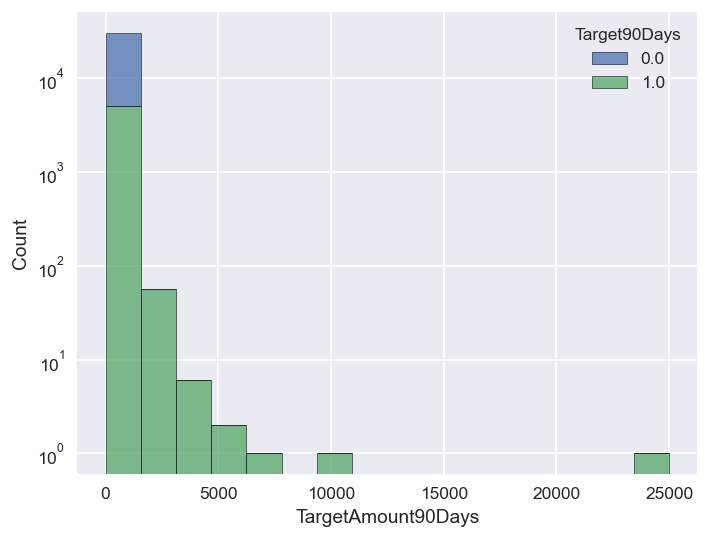

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# We have selected only continuous quantitative variables

plt.figure(dpi=125)
plt.style.use('seaborn')

sns.histplot(data = df, x = 'TargetAmount90Days', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it is **skewed right**, tending to have lower values. 

- **Outliers**: We can see an **outlier** around 25.000 that we might delete later to have a better model prediction, since extreme values with little representation might alter the accuracy of our model.

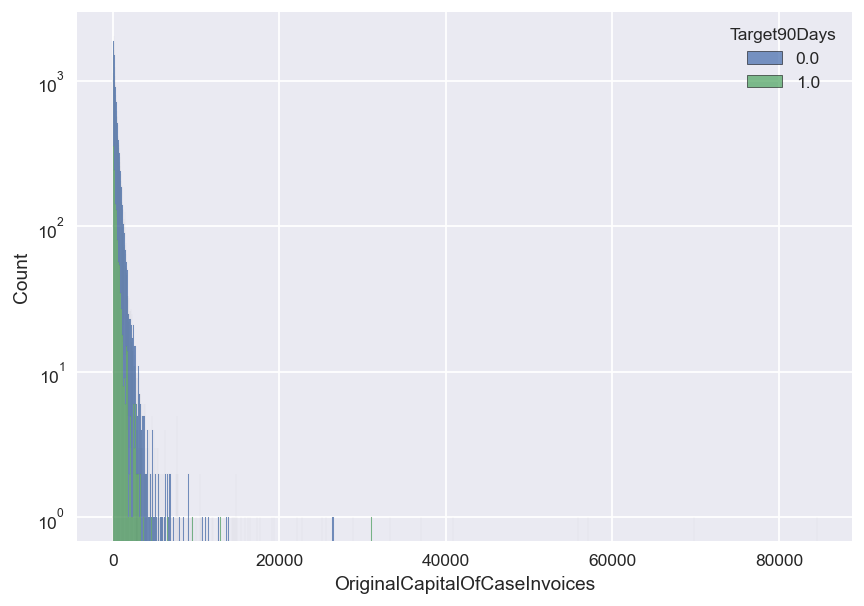

In [8]:
plt.figure(dpi=125)
sns.histplot(data = df, x = 'OriginalCapitalOfCaseInvoices', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it is **skewed right**, tending to have lower values. 

- **Outliers**: We can see some **outliers** (around 25.000 and 40.000) that we might delete later to have a better model prediction, since extreme values with little representation might alter the accuracy of our model.

- **Observations**: **Debtors owing more money tend to take more time to pay.**

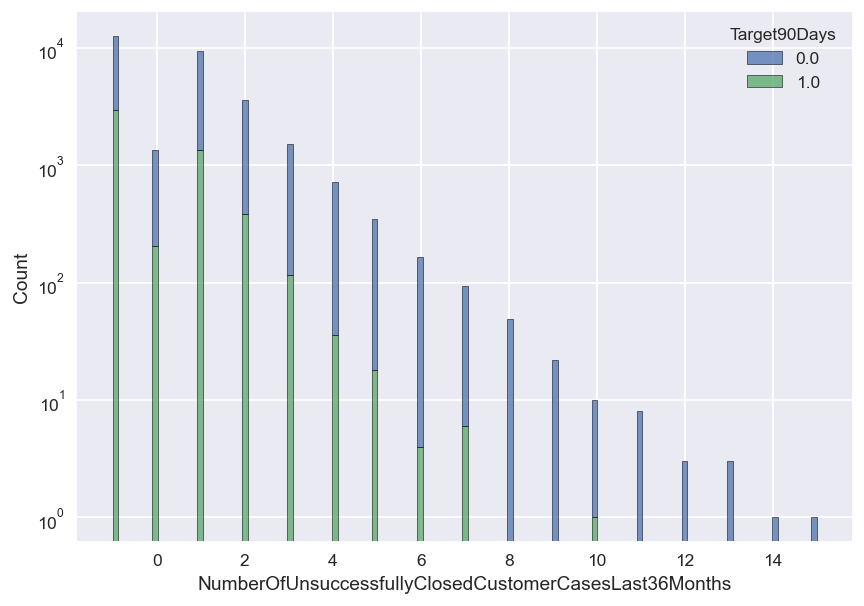

In [9]:
plt.figure(dpi=125)
sns.histplot(data = df, x = 'NumberOfUnsuccessfullyClosedCustomerCasesLast36Months', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it is **skewed right**, tending to have lower values. 

- **Outliers**: Apparently, no outliers.

- **Observations**: **Debtors that have not paid in 90 days tend to have unsuccesfully closed** cases in the last 36 months.

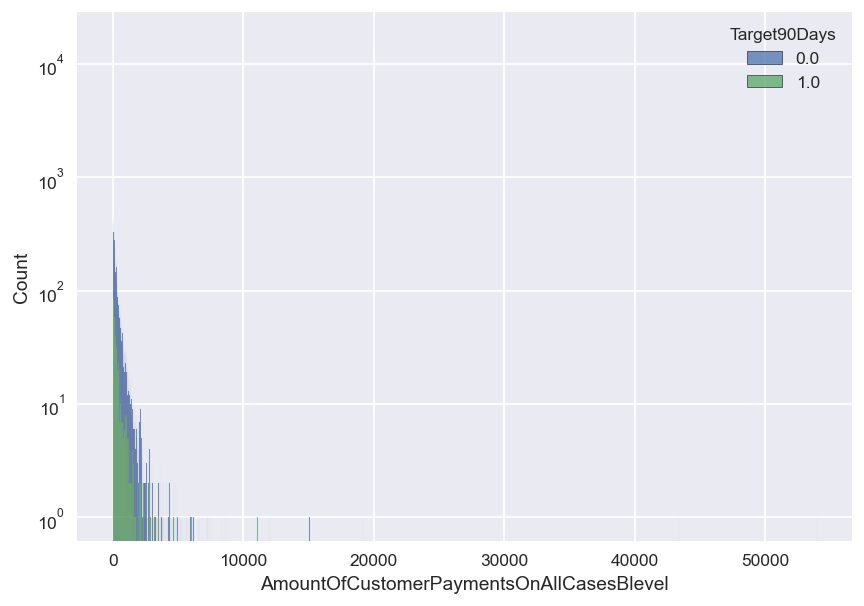

In [10]:
plt.figure(dpi=125)
sns.histplot(data = df, x = 'AmountOfCustomerPaymentsOnAllCasesBlevel', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it is **skewed right**, tending to have lower values. 

- **Outliers**: We can see an **outlier** (around 45.000) that we might delete later to have a better model prediction, since extreme values with little representation might alter the accuracy of our model.

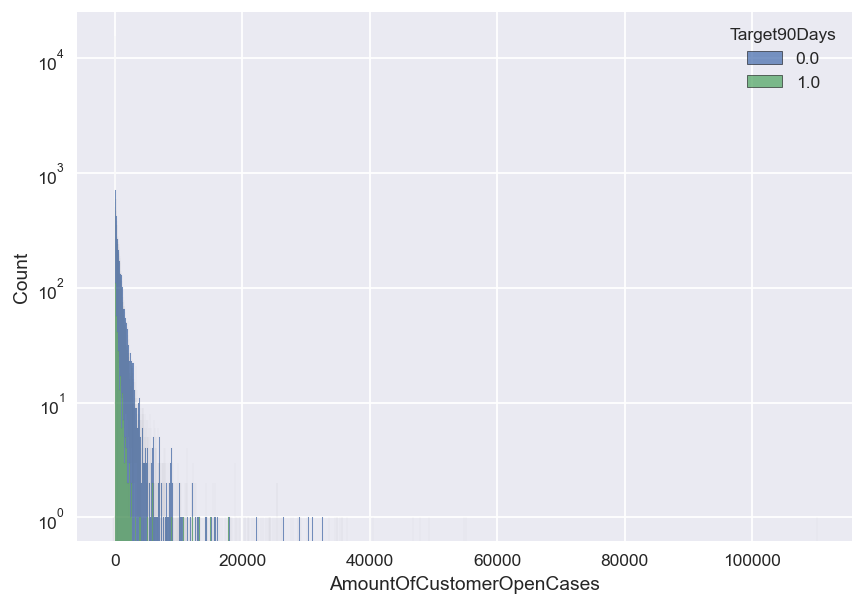

In [11]:
plt.figure(dpi=125)
sns.histplot(data = df, x = 'AmountOfCustomerOpenCases', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it is **skewed right**, tending to have lower values. 

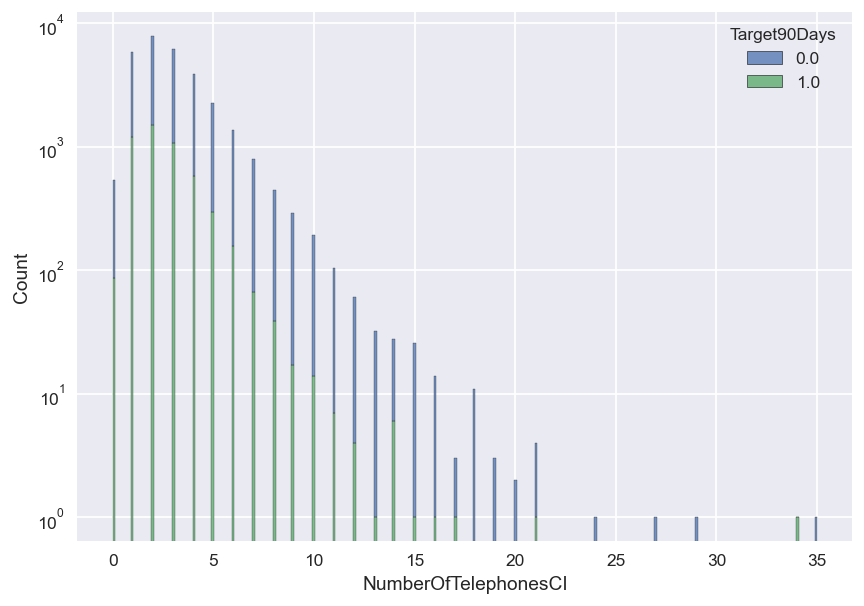

In [12]:
plt.figure(dpi=125)
sns.histplot(data = df, x = 'NumberOfTelephonesCI', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it is **skewed right**, tending to have lower values. 

- **Observations**: **Debtors with more telephones, tend to take more than 90 days to pay.** 

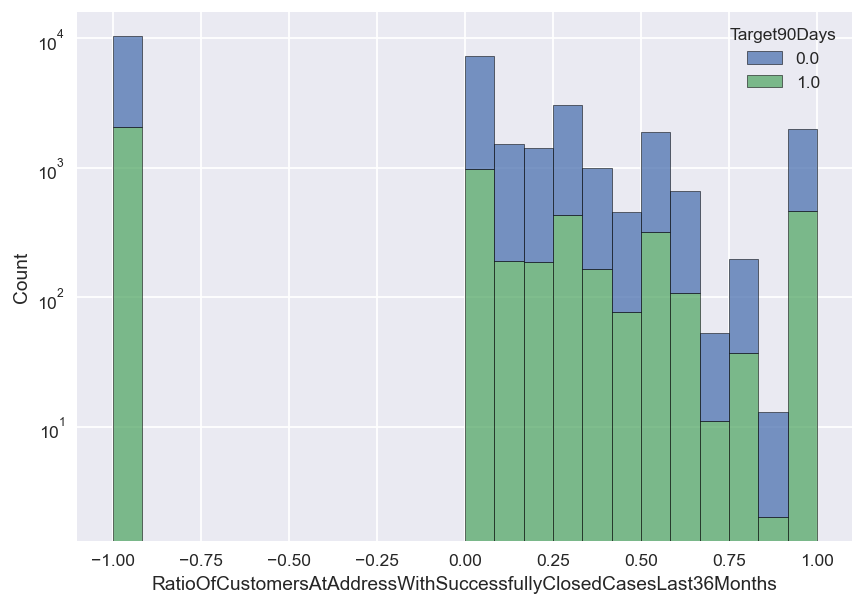

In [13]:
plt.figure(dpi=125)
sns.histplot(data = df, x = 'RatioOfCustomersAtAddressWithSuccessfullyClosedCasesLast36Months', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it has a **multimodal distribution** showing more than one peak. 

- **Observations**: The **proportion of paying in 90 days to not paying in 90 barely changes** with this variable.

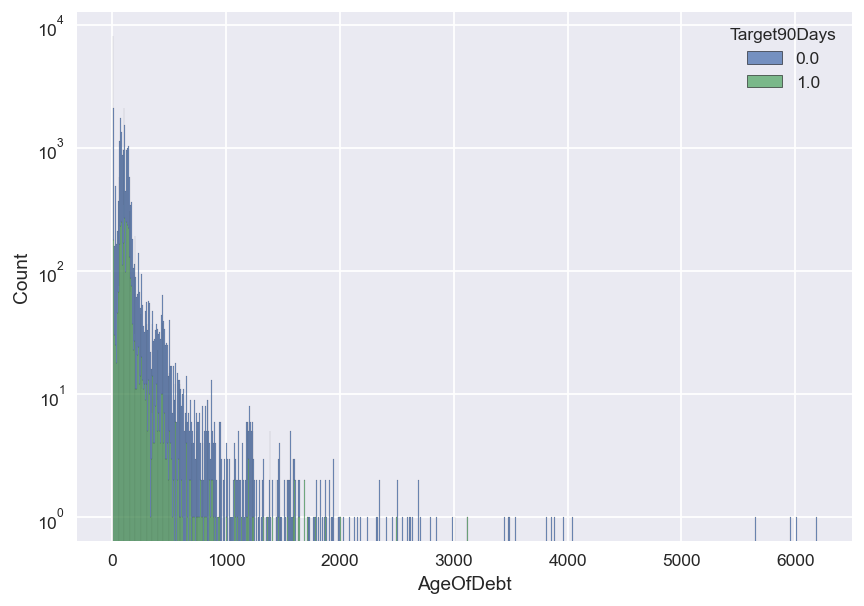

In [14]:
plt.figure(dpi=125)
sns.histplot(data = df, x = 'AgeOfDebt', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it is **skewed right**, tending to have lower values. 

- **Outliers**: We can see some **outliers** around 3.500-5.500 that we might delete later to have a better model prediction, since extreme values with little representation might alter the accuracy of our model.

- **Observations**: **Debtors with more age of debt tend to take more than 90 days to pay**

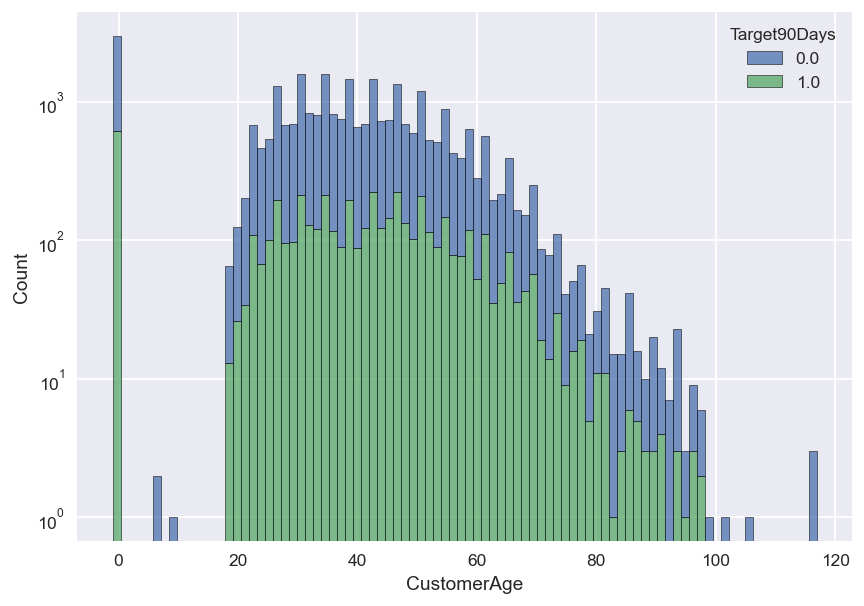

In [15]:
plt.figure(dpi=125)
sns.histplot(data = df, x = 'CustomerAge', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it is **skewed right**, tending to have lower values. 

- **Outliers**: We can see some **outliers** around 120. Therse are companies that might have been active for a long time. 

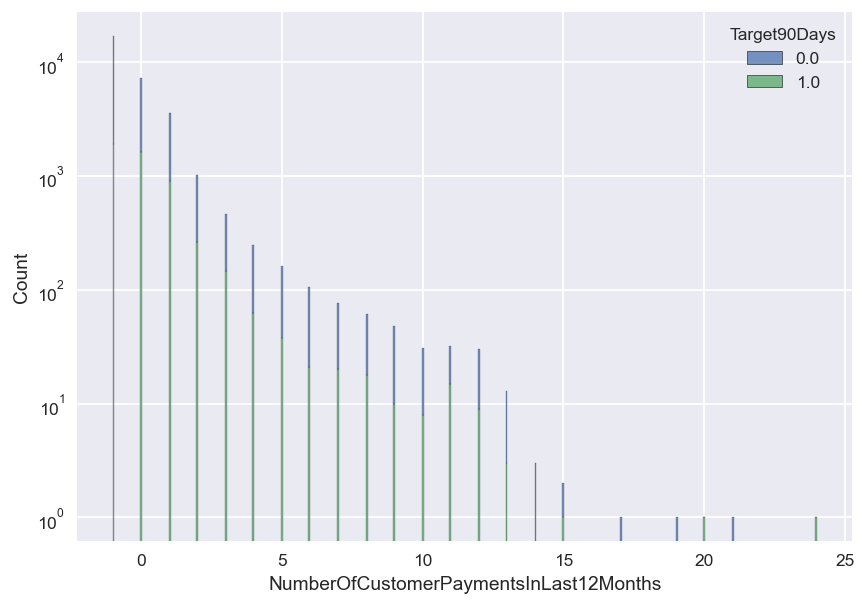

In [16]:
plt.figure(dpi=125)
sns.histplot(data = df, x = 'NumberOfCustomerPaymentsInLast12Months', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it is **skewed right**, tending to have lower values. 

- **Observations**: There are **debtors that have never paid at all**, as we can see -1 values in the histogram.

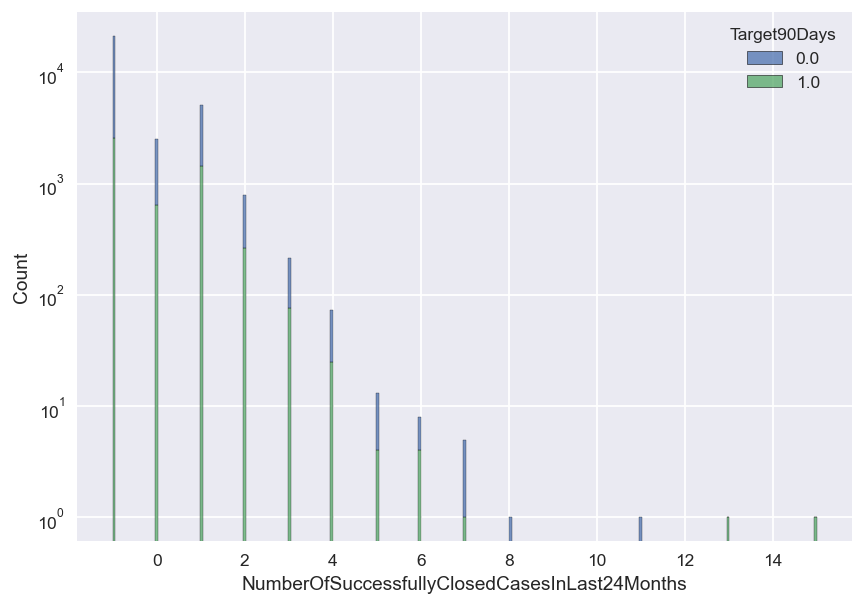

In [17]:
plt.figure(dpi=125)
sns.histplot(data = df, x = 'NumberOfSuccessfullyClosedCasesInLast24Months', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it is **skewed right**, tending to have lower values. 

- **Observations**: As the number of successfully closed cases increases, the frequency of **paying in less than 90 days also increases**.

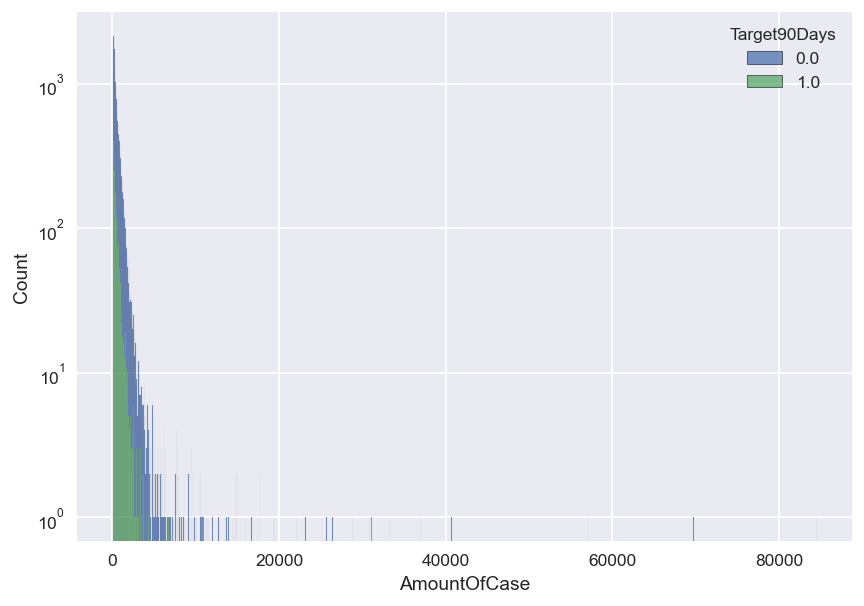

In [18]:
plt.figure(dpi=125)
sns.histplot(data = df, x = 'AmountOfCase', hue = 'Target90Days', multiple = 'stack')
plt.yscale('log') 
plt.show()

- **Distribution**: This variable **does not display a normal distribution**. In fact, it is **skewed right**, tending to have lower values. 

- **Outliers**: We can see some **outliers** around 35.000 that we might delete later to have a better model prediction, since extreme values with little representation might alter the accuracy of our model.

- **Observations**: **Debtors owing more money tend to take more time to pay.** 

#### Barcharts

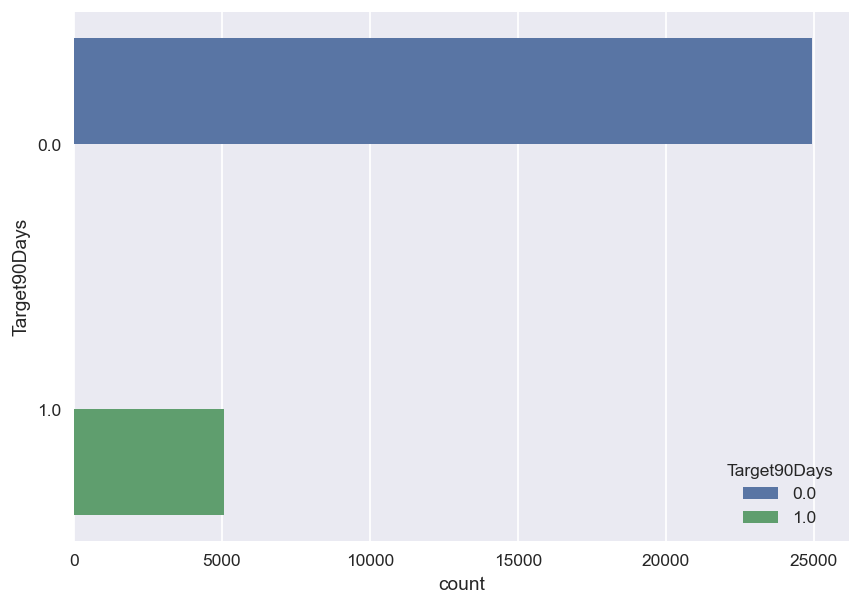

(0:1) Ratio: 0.1687


In [19]:
# We have selected only qualitative variables

plt.figure(dpi=125)
sns.countplot(data = df, y = 'Target90Days', hue = 'Target90Days')
plt.show() 

ratio_target = float(df['Target90Days'].value_counts()[1]/df['Target90Days'].count())
print('(0:1) Ratio: %.4f'% ratio_target)

- **Observations:** As we can see, only a **16.87% of debtors pay within 90 days.**

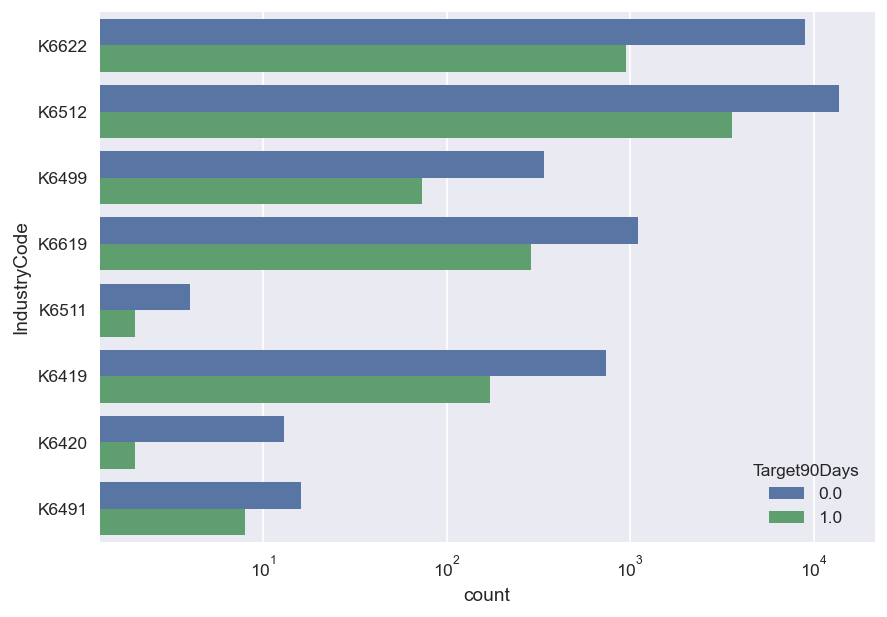

In [20]:
plt.figure(dpi=125)
sns.countplot(data = df, y = 'IndustryCode', hue = 'Target90Days')
plt.xscale('log')
plt.show()  

- **Observations:** As we can see, the **paying ratio barely changes between industries.**

### Identifying Relationships in our Dataset

As we continue to understand your dataset, we can begin to pick out relationships between variables. Using **scatterplots** can make it easier to identify correlations.

First of all, we are going to reduce the number of variables, retaining only those more correlated to our target variable (`Target90Days`).

In [21]:
df.corr()['Target90Days'].sort_values(ascending=False, key = abs)

Target90Days                                                        1.000000
TargetAmount90Days                                                  0.455047
NumberOfSuccessfullyClosedCasesInLast24Months                       0.186664
NumberOfUnsuccessfullyClosedCustomerCasesLast36Months              -0.153592
NumberOfCustomerPaymentsInLast12Months                              0.126803
NumberOfTelephonesCI                                               -0.085084
AmountOfCustomerPaymentsOnAllCasesBlevel                            0.071552
NumberOfCustomerIncomingCallDatesTee                                0.064621
AmountOfCustomerOpenCases                                          -0.051487
LastOriginalClosingCodeOfCustomer                                   0.038616
RatioOfCustomersAtAddressWithSuccessfullyClosedCasesLast36Months   -0.032772
OriginalCapitalOfCaseInvoices                                      -0.029353
AmountOfCase                                                       -0.027784

As we can see, many of our observations analyzing the histograms are supported by this correlation matrix. From now on, in order to simplify the correlation analysis and avoid unnecessary modelling variables, **we will work with the most correlated variables**.

In [22]:
df_x = df.filter(['NumberOfSuccessfullyClosedCasesInLast24Months', 'NumberOfUnsuccessfullyClosedCustomerCasesLast36Months', 'NumberOfCustomerPaymentsInLast12Months', 'NumberOfTelephonesCI', 'AmountOfCustomerPaymentsOnAllCasesBlevel', 'NumberOfCustomerIncomingCallDatesTee', 'AmountOfCustomerOpenCases'])
df_y = df.filter(['Target90Days'])

Next, we will **study the correlation between the variables of the set x** to reduce those that have a clear relationship with each other. In this way, we will reduce the noise and improve our classification model.

In [23]:
df_x.corr()

,NumberOfSuccessfullyClosedCasesInLast24Months,NumberOfUnsuccessfullyClosedCustomerCasesLast36Months,NumberOfCustomerPaymentsInLast12Months,NumberOfTelephonesCI,AmountOfCustomerPaymentsOnAllCasesBlevel,NumberOfCustomerIncomingCallDatesTee,AmountOfCustomerOpenCases
NumberOfSuccessfullyClosedCasesInLast24Months,1.000000,-0.173953,0.481131,-0.008085,0.339832,0.186969,-0.071859
NumberOfUnsuccessfullyClosedCustomerCasesLast36Months,-0.173953,1.000000,-0.036590,0.440545,-0.011942,0.070427,0.064468
NumberOfCustomerPaymentsInLast12Months,0.481131,-0.036590,1.000000,0.092227,0.351041,0.355099,0.042715
NumberOfTelephonesCI,-0.008085,0.440545,0.092227,1.000000,0.083951,0.156131,0.169996
AmountOfCustomerPaymentsOnAllCasesBlevel,0.339832,-0.011942,0.351041,0.083951,1.000000,0.234621,0.045849
NumberOfCustomerIncomingCallDatesTee,0.186969,0.070427,0.355099,0.156131,0.234621,1.000000,0.052850
AmountOfCustomerOpenCases,-0.071859,0.064468,0.042715,0.169996,0.045849,0.052850,1.000000


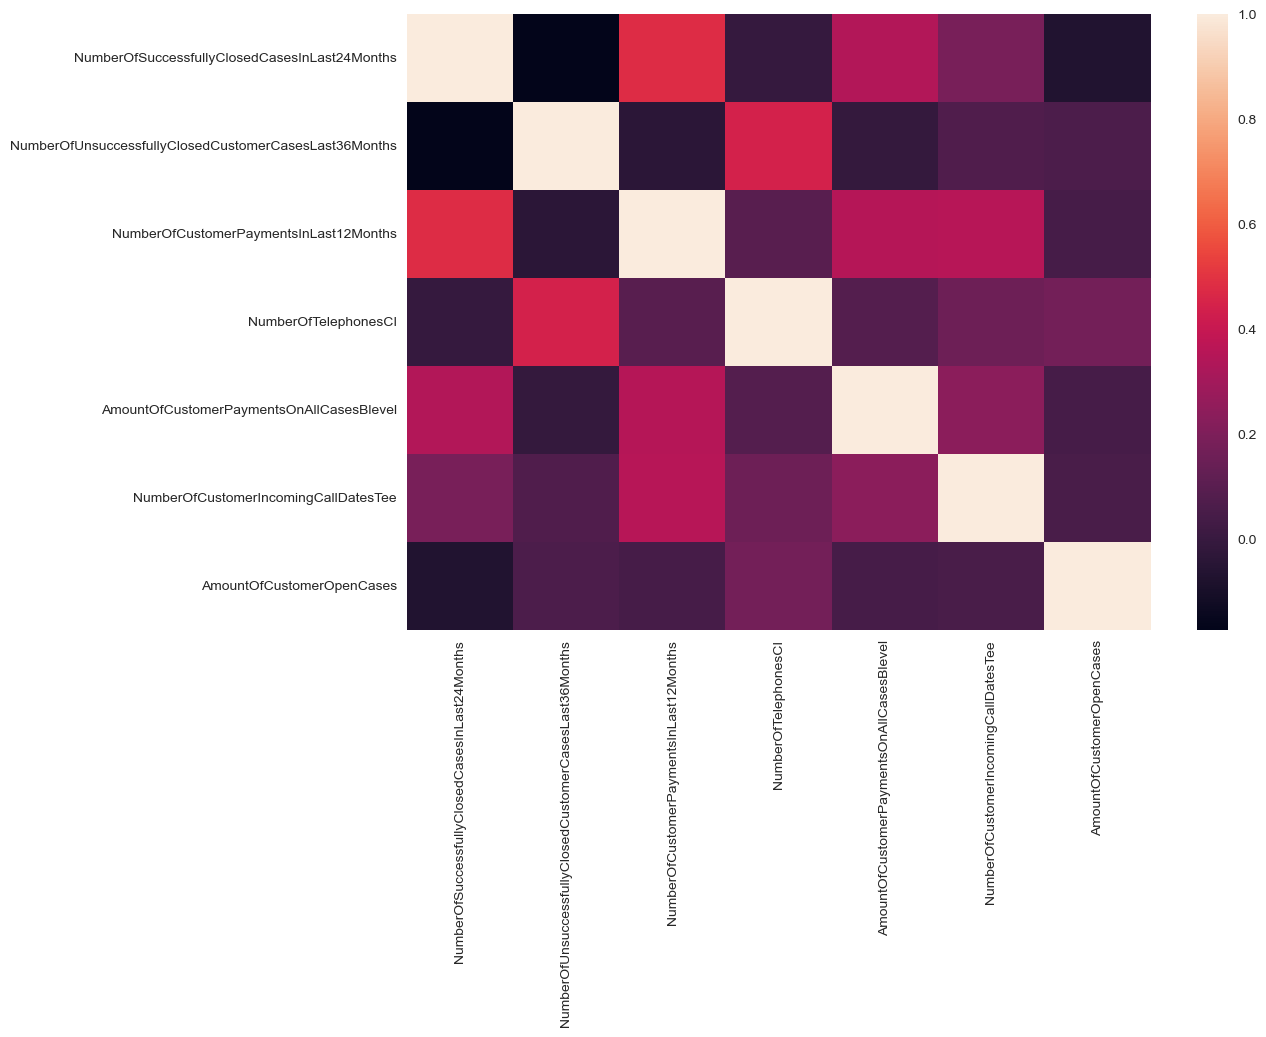

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df_x.corr())
plt.show()

Although a slight correlation can be perceived between some variables, **none is large enough to solidly state that they are dependent on each other**. Therefore, we will not remove any variables.

#### Scatterplots

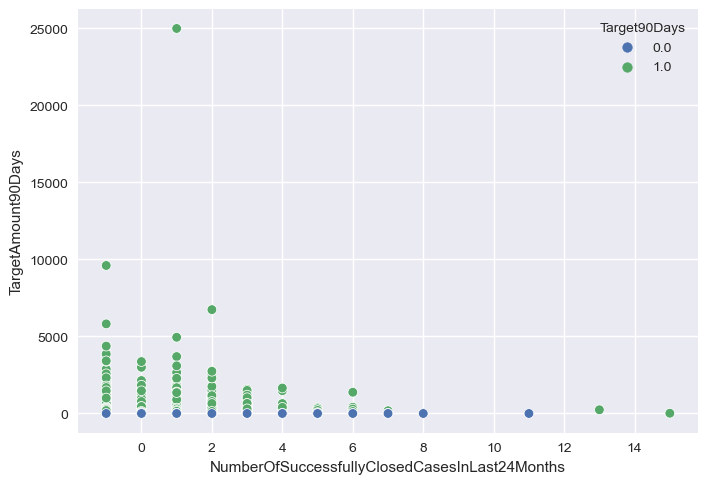

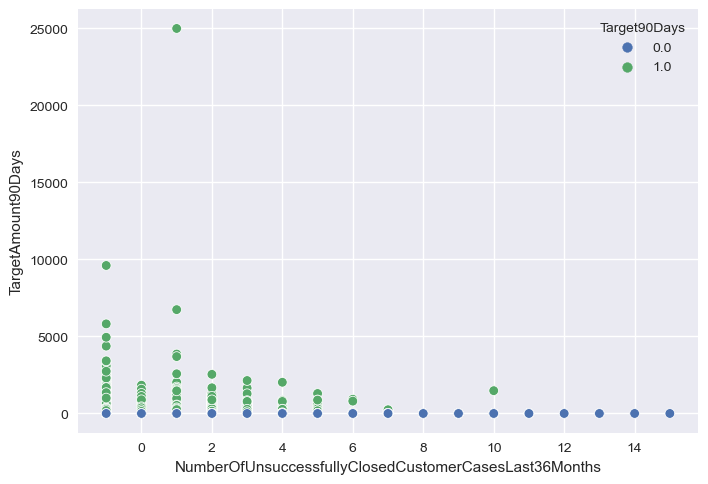

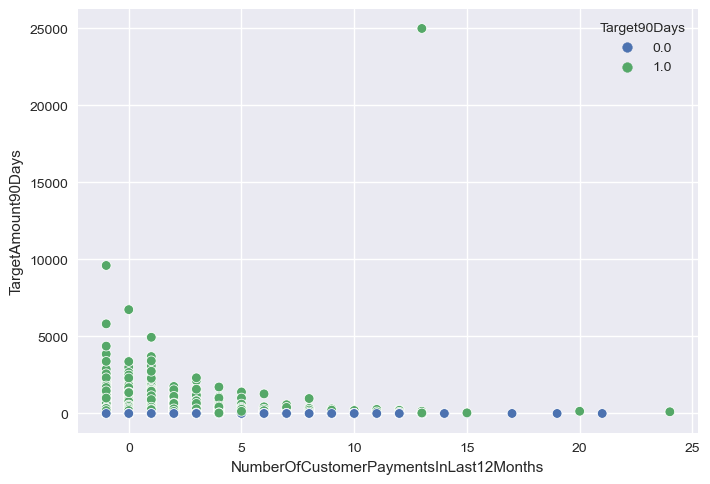

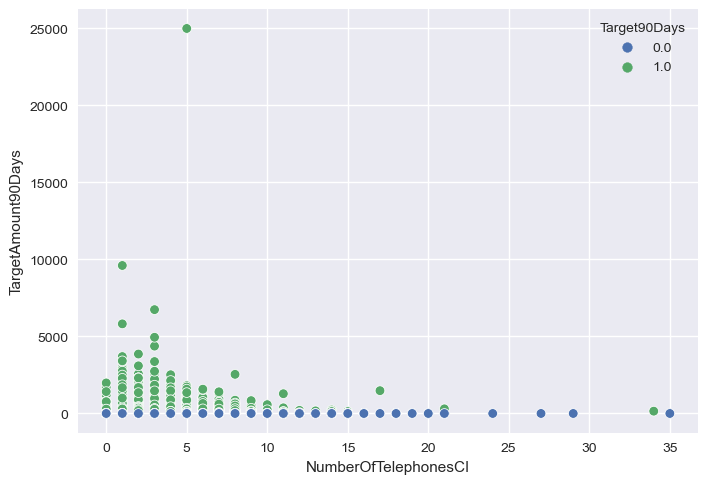

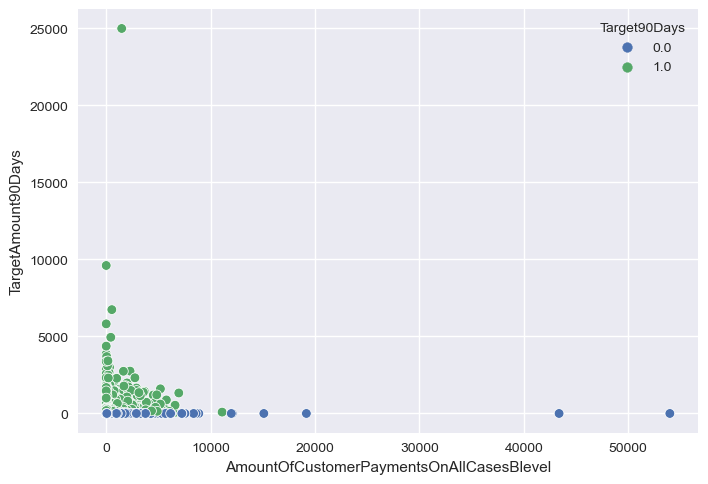

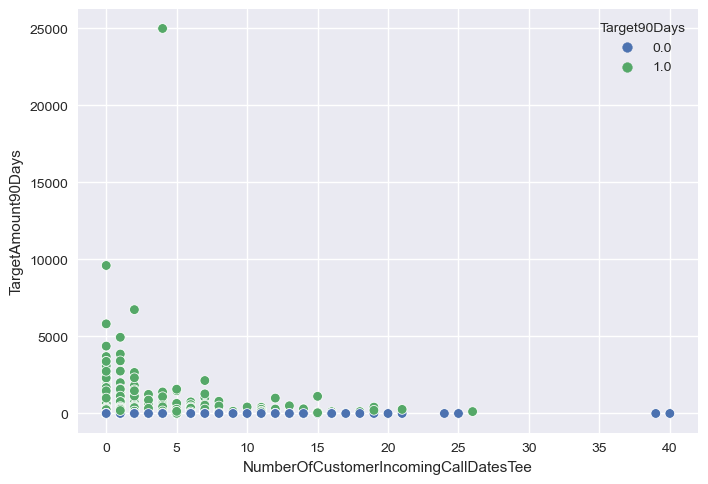

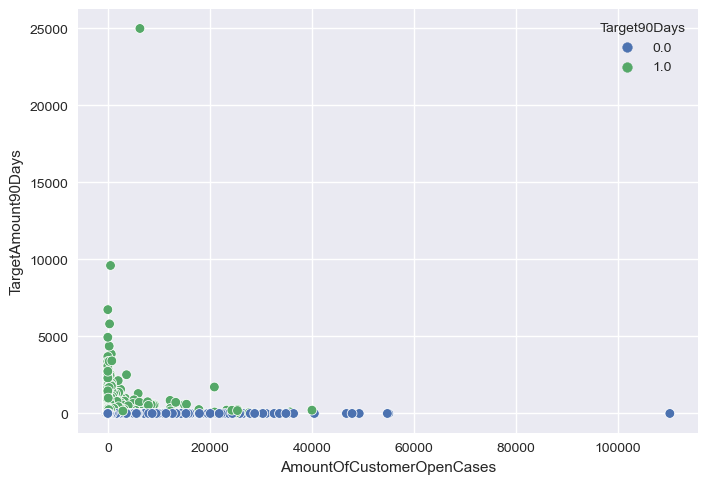

In [25]:
for column in ['NumberOfSuccessfullyClosedCasesInLast24Months', 'NumberOfUnsuccessfullyClosedCustomerCasesLast36Months', 'NumberOfCustomerPaymentsInLast12Months', 'NumberOfTelephonesCI', 'AmountOfCustomerPaymentsOnAllCasesBlevel', 'NumberOfCustomerIncomingCallDatesTee', 'AmountOfCustomerOpenCases']: 
    sns.scatterplot(data = df, x = column, y = 'TargetAmount90Days', hue = 'Target90Days')
    plt.show()

### Locating & Removing any Outliers in our Dataset

Outliers are data points in a dataset that are considered to be extreme, false, or not representative of what the data is describing. These outliers can be caused by either incorrect data collection or genuine outlying observations. Removing these outliers will often help our model to generalize better as these long tail observations could skew the learning. For instance, after having analyzed the histograms, we have noticed customers with 0 years or customers who supposedly have never paid but have paid at least once.

#### Boxplots

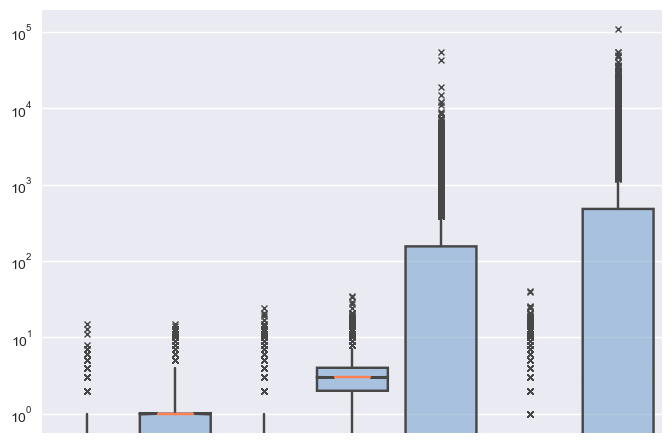

In [26]:
sns.boxplot(
    data=df_x,
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"}
)
plt.yscale('log')
plt.xticks([])
plt.show()

As we can see, since the **data distribution is not normal, boxplots are not the best way to discern outliers**. Therefore, we will manually remove the most extreme data by using Pandas dataframe filtering. Concretely, those points commented while analyzing the histograms.

**1. Setting up a mask to filter the outliers.**

This mask will set True those rows values that we want to discard.

In [27]:
mask = (df['CustomerAge'] < 18) | (df['CustomerAge'] > 100) | (df['AmountOfCustomerPaymentsOnAllCasesBlevel'] > 40_000) | (df['TargetAmount90Days'] > 20_000) | (df['OriginalCapitalOfCaseInvoices'] > 20_000) | (df['AgeOfDebt'] > 3_500) 
mask

case_id
1        False
2        False
3        False
4        False
5        False
         ...  
29996    False
29997    False
29998    False
29999    False
30000    False
Length: 30000, dtype: bool

**2. Dropping the outliers.**

To do this, we invert the boolean values of the mask using the ~ operator.

In [28]:
df_x = df_x.loc[~mask]
df_y = df_y.loc[~mask]

df_x

,NumberOfSuccessfullyClosedCasesInLast24Months,NumberOfUnsuccessfullyClosedCustomerCasesLast36Months,NumberOfCustomerPaymentsInLast12Months,NumberOfTelephonesCI,AmountOfCustomerPaymentsOnAllCasesBlevel,NumberOfCustomerIncomingCallDatesTee,AmountOfCustomerOpenCases
case_id,,,,,,,
1,-1.0,2.0,0.0,2.0,0.00,0.0,238.38
2,1.0,-1.0,0.0,5.0,210.53,2.0,0.00
3,-1.0,1.0,-1.0,2.0,-1.00,0.0,0.00
4,-1.0,-1.0,-1.0,3.0,-1.00,0.0,54.14
5,-1.0,2.0,0.0,6.0,20.00,0.0,83.00
...,...,...,...,...,...,...,...
29996,1.0,-1.0,3.0,3.0,978.62,0.0,242.06
29997,-1.0,-1.0,-1.0,2.0,-1.00,1.0,25408.75
29998,-1.0,1.0,-1.0,3.0,-1.00,0.0,0.00


We have removed 3017 rows with outliers.

## Data Classification Model

In machine learning, classification refers to a **predictive modeling problem where a class label is predicted for a given example of input data**. In this case, we want to predict if a debtor will pay in less than 90 days.

We will use a **Decision Tree Clasifier**, a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

**1. Splitting train and test sets**

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0, stratify=df_y)

**2. Creating the model**

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

**3. Training the model**

In [31]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

**4. Evaluating the performance of the model**

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Creating a confussion matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print('Confussion Matrix ------------------')
print(cm)

# Creating a classification report
target_names = ['0', '1']

print('\nClassification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Not Paying in 90 days: \n%s ' % report['0'])
print('Paying in 90 days: \n%s ' % report['1'])

Confussion Matrix ------------------
[[5853  908]
 [1051  283]]

Classification report ------------------
Not Paying in 90 days: 
{'precision': 0.8477694090382387, 'recall': 0.865700340186363, 'f1-score': 0.8566410537870472, 'support': 6761} 
Paying in 90 days: 
{'precision': 0.23761544920235098, 'recall': 0.212143928035982, 'f1-score': 0.22415841584158414, 'support': 1334} 


As we can see, the model is **good at predicting whether someone will not pay (84.2% precision)**, but it **fails at
predict if someone is going to pay (23.8%)**. Since the task of this project is not to optimize a model, but only to carry out an EDA, we will not proceed to its full optimization. However, possible courses of action would be:

- **Changing the classifier** to another of the available options (nearby neighbors, naive bays, neural networks, random forest...).

- **Recovering deleted outliers**. Sometimes the outliers make the model prediction worse, but other times they are real values that are necessary for a good training of the model.

- **Choosing more or fewer variables**. Perhaps, when trying to choose those that are most correlated, we have skipped over some that would enhance another in the model. Or maybe there are too many.

- **Changing the test size**. The database is not very large, so having more training samples would enhance the performance of the model.

- **Choosing better what to do with null values**. In fact, I initially converted the NAs to 0s, but it turned out that the EDA made more sense and the model had better results converting them to -1s (which makes sense because they don't mean the same thing).

**Let's try again with some changes...**

- The detected outliers were not removed.
- The least correlated variable of the x set (`AmountOfCustomerOpenCases`) was deleted.
- The classifier is Random Forest now.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df_x = df.filter(['NumberOfSuccessfullyClosedCasesInLast24Months', 'NumberOfUnsuccessfullyClosedCustomerCasesLast36Months', 'NumberOfCustomerPaymentsInLast12Months', 'NumberOfTelephonesCI', 'AmountOfCustomerPaymentsOnAllCasesBlevel', 'NumberOfCustomerIncomingCallDatesTee'])
df_y = df.filter(['Target90Days'])

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0, stratify=df_y)

clf = RandomForestClassifier(n_estimators = 100, random_state=0)
clf.fit(x_train, y_train.values.ravel())

# Creating a confussion matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print('Confussion Matrix ------------------')
print(cm)

# Creating a classification report
target_names = ['0', '1']

print('\nClassification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print('Not Paying in 90 days: \n%s ' % report['0'])
print('Paying in 90 days: \n%s ' % report['1'])

Confussion Matrix ------------------
[[7052  429]
 [1310  209]]

Classification report ------------------
Not Paying in 90 days: 
{'precision': 0.8433389141353743, 'recall': 0.9426547253041038, 'f1-score': 0.8902354352079782, 'support': 7481} 
Paying in 90 days: 
{'precision': 0.3275862068965517, 'recall': 0.13759052007899933, 'f1-score': 0.19378766805748726, 'support': 1519} 


As we can see, this model is **significantly better than the previous one at predicting if someone is going to pay** (before: 23.8%; now: 32.8%)

## Conclusions 

To sum up, we can say that Explotatory Data Analysys is a proven methodology that can help Data Scientist to make sense of complex datasets. By using visualizations and other methods, we could uncover patterns and relationships that we might not have found otherwise. In addition, understanding how variables interact with each other and how they correlate with our target variable, as well as eliminating unwanted values, helps significantly in creating a good classification model.

Therefore, and to conclude, **exploratory data analysis is - and must be - the best tool of a good Data Scientist**.